In [1]:
import pandas as pd
df=pd.read_csv("Titanic_test.csv")
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


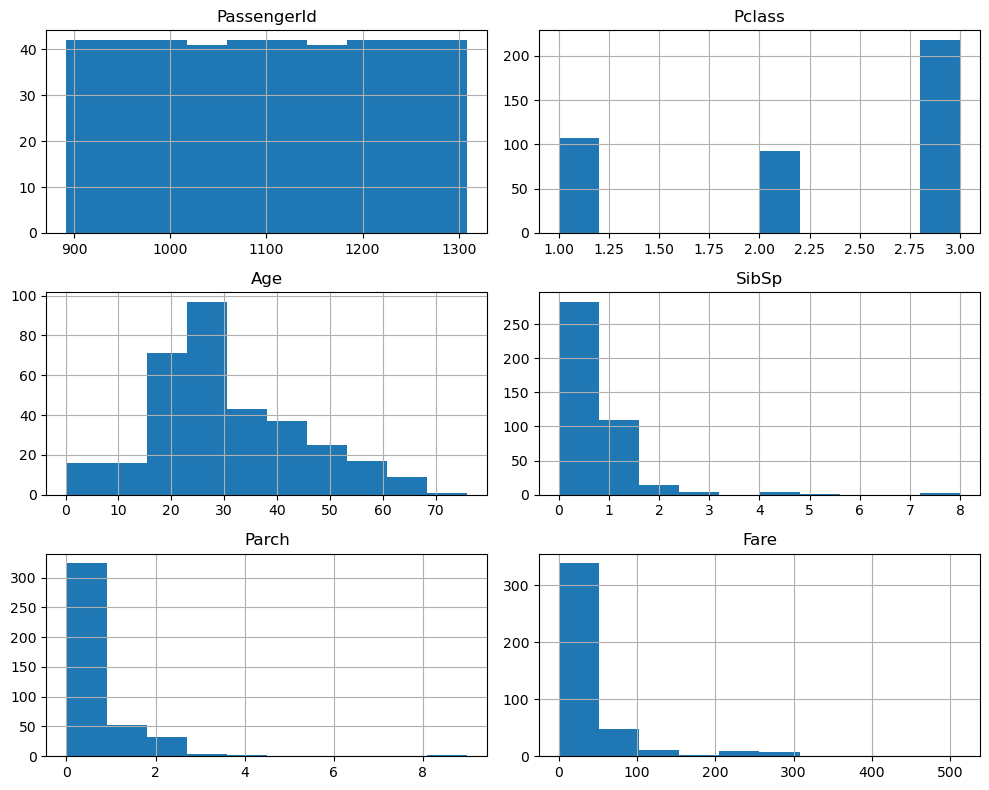

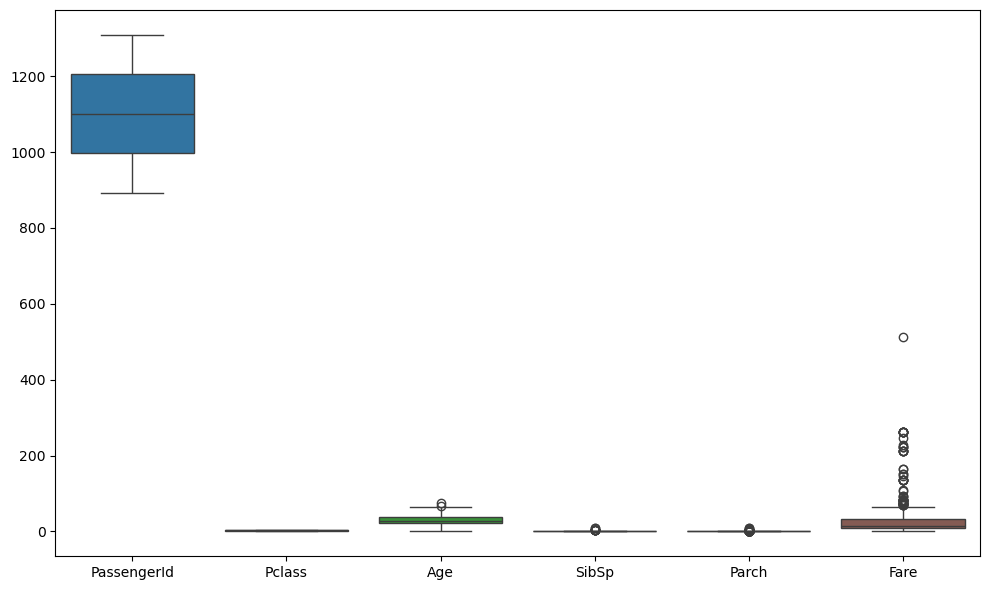

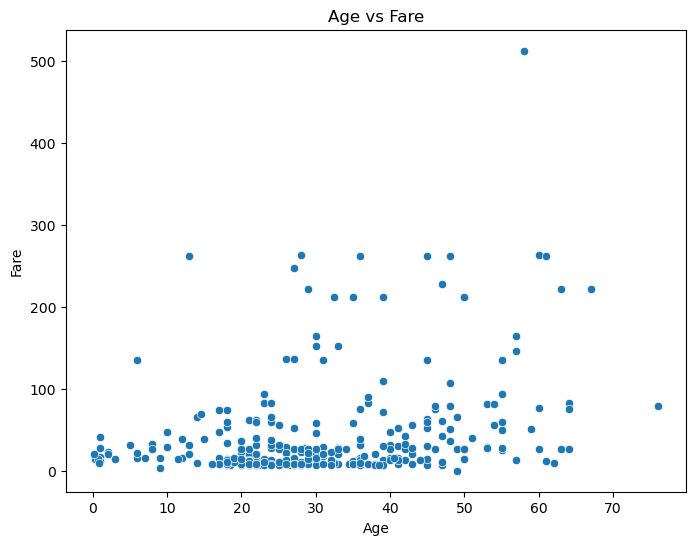

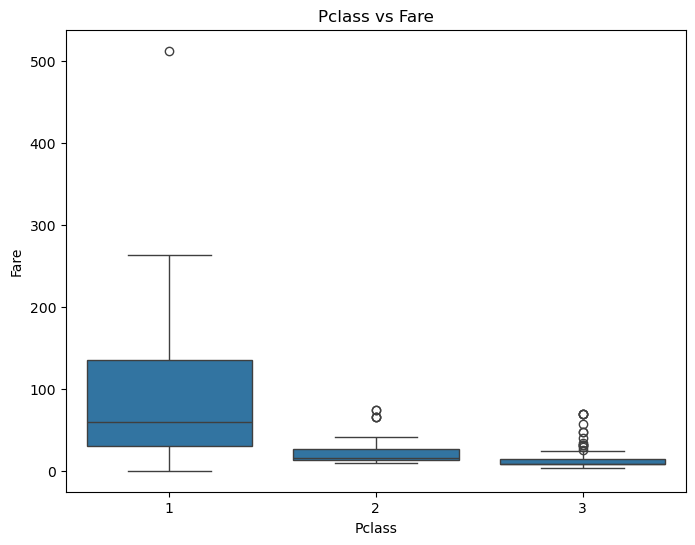

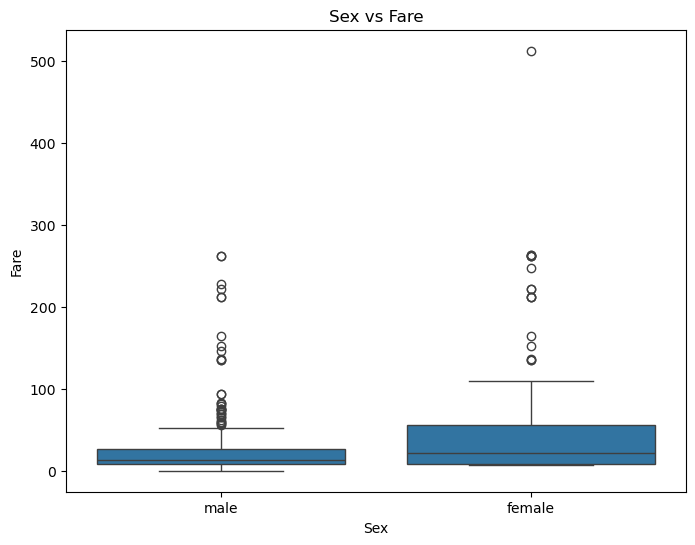

In [3]:
#  Exploratory Data Analysis (EDA):
# 1.	Load the Titanic dataset using Python's pandas library.
# 2.	Check for missing values.
# 3.	Explore data distributions using histograms and box plots.
# 4.	Visualize relationships between features and survival using scatter plots and bar plots.

import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(df.isnull().sum())

# Explore data distributions
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Age vs Fare')
plt.show()

# Example: Pclass vs Fare
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Pclass vs Fare')
plt.show()

# Example: Sex vs Fare
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Fare', data=df)
plt.title('Sex vs Fare')
plt.show()

In [41]:
#  Data Preprocessing:
# 1.	Impute missing values.
# 2.	Encode categorical variables using one-hot encoding or label encoding.
# 3.	If needed you can apply more preprocessing methods on the given dataset.

# Data Preprocessing

# 1. Impute missing values
# For 'Age', we can impute with the median
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())


df.drop('Cabin', axis=1, inplace=True, errors='ignore')



print("Missing values after imputation:")
print(df.isnull().sum())

# 2. Encode categorical variables
# 'Sex' is a categorical variable, we can use one-hot encoding
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})



# 'Name', 'Ticket' are generally not useful for the model and can be dropped.
df.drop(['Name', 'Ticket'], axis=1, inplace=True, errors='ignore') # Also add errors='ignore' here

# Display the first few rows of the preprocessed dataframe
print("\nDataFrame after preprocessing:")
print(df.head())


df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print("\nDataFrame with FamilySize:")
print(df.head())

# Creating 'IsAlone' feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
print("\nDataFrame with IsAlone:")
print(df.head())



# Display final processed dataframe info
print("\nFinal Processed DataFrame Info:")
df.info()

Missing values after imputation:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

DataFrame after preprocessing:
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0          892       3    0  34.5      0      0   7.8292        Q
1          893       3    1  47.0      1      0   7.0000        S
2          894       2    0  62.0      0      0   9.6875        Q
3          895       3    0  27.0      0      0   8.6625        S
4          896       3    1  22.0      1      1  12.2875        S

DataFrame with FamilySize:
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  FamilySize
0          892       3    0  34.5      0      0   7.8292        Q           1
1          893       3    1  47.0      1      0   7.0000        S           2
2          894       2    0  62.0      0      0   9.6875        Q           1
3          895  

In [43]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [68]:
df = pd.read_csv('Titanic_test.csv')
print(df.columns)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [27]:
# Evaluate and compare
metrics = {
    "Model": ["LightGBM", "XGBoost"],
    "Accuracy": [accuracy_score(y_test, lgb_preds), accuracy_score(y_test, xgb_preds)],
    "Precision": [precision_score(y_test, lgb_preds), precision_score(y_test, xgb_preds)],
    "Recall": [recall_score(y_test, lgb_preds), recall_score(y_test, xgb_preds)],
    "F1 Score": [f1_score(y_test, lgb_preds), f1_score(y_test, xgb_preds)],
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)


      Model  Accuracy  Precision    Recall  F1 Score
0  LightGBM  0.821229   0.783784  0.783784  0.783784
1   XGBoost  0.798883   0.756757  0.756757  0.756757


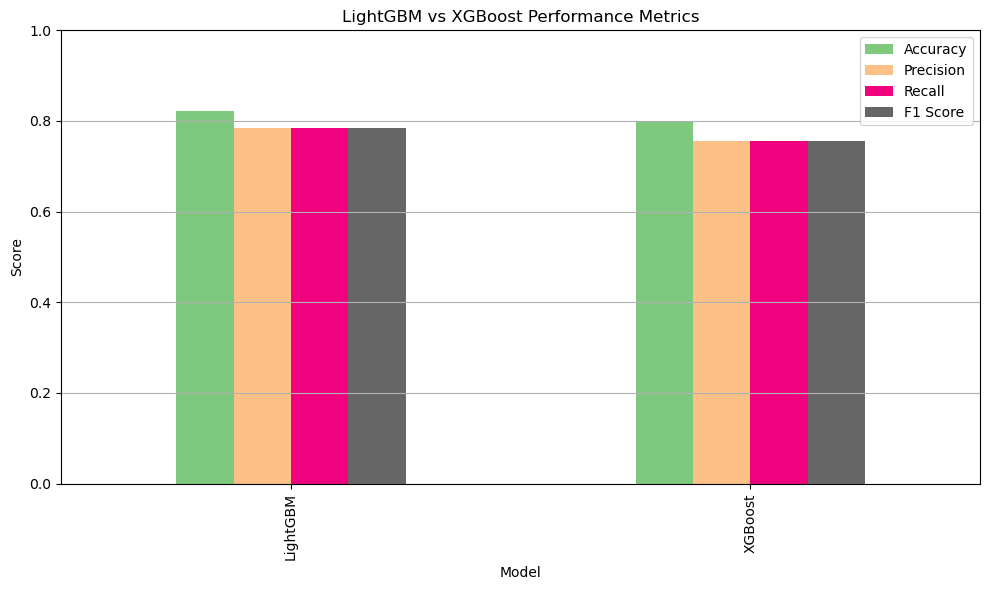

In [29]:
# Visualization
metrics_df.set_index("Model").plot(kind="bar", figsize=(10, 6), colormap="Accent")
plt.title("LightGBM vs XGBoost Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

C:\Users\vogul\anaconda4\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:52:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


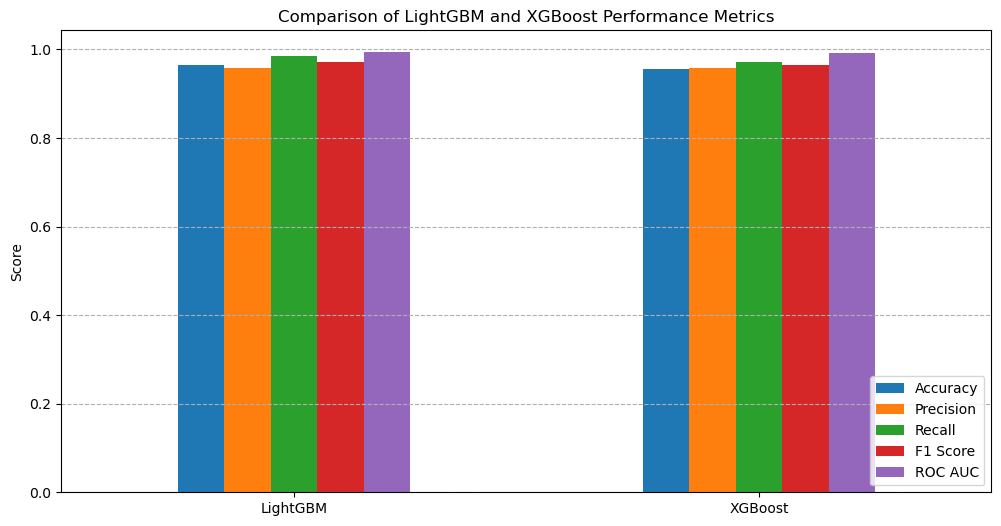

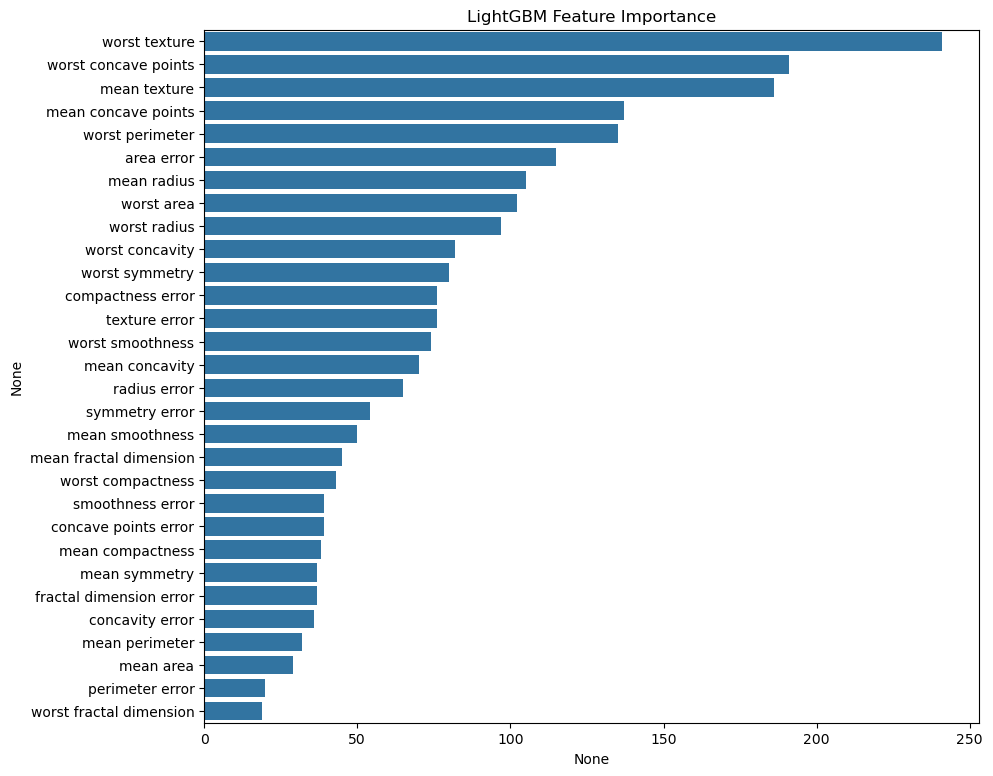

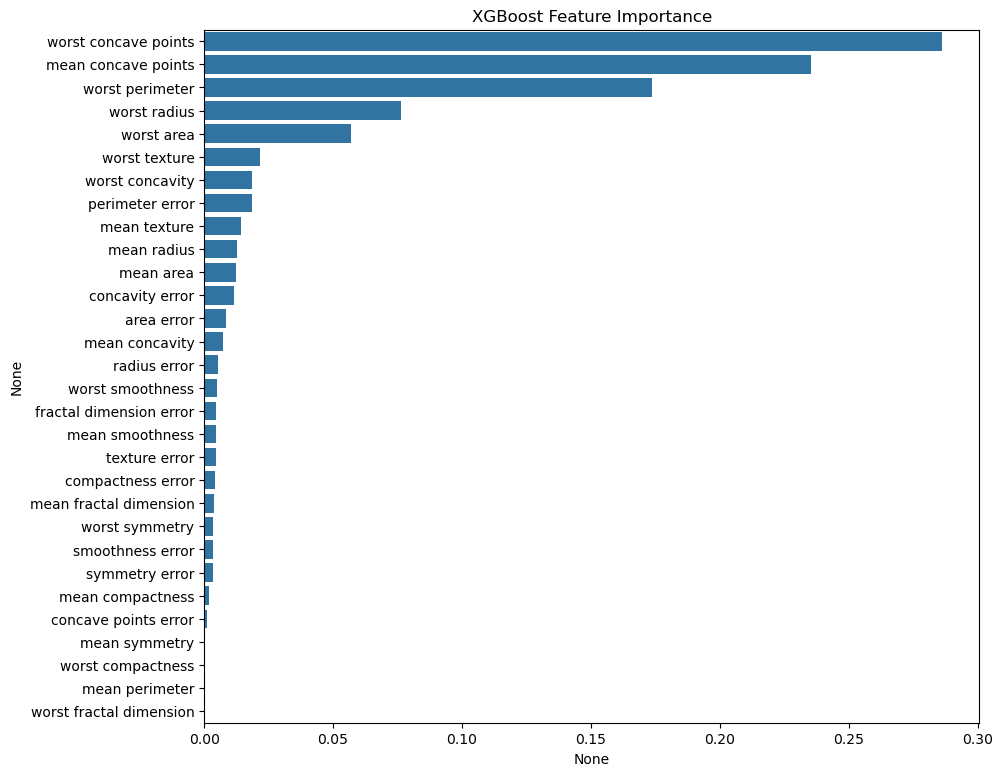

In [8]:
# Comparative Analysis:
# 1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
# 2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

# Assume X_train, X_test, y_train, y_test are already defined

!pip install lightgbm xgboost scikit-learn matplotlib seaborn

import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
# Import a sample dataset for demonstration purposes
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- Train LightGBM ---
lgb_clf = lgb.LGBMClassifier(random_state=42)
lgb_clf.fit(X_train, y_train)
lgb_predictions = lgb_clf.predict(X_test)
lgb_proba = lgb_clf.predict_proba(X_test)[:, 1]

# --- Train XGBoost ---
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_predictions = xgb_clf.predict(X_test)
xgb_proba = xgb_clf.predict_proba(X_test)[:, 1]

# --- Calculate Metrics ---
def get_metrics(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)
    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}

lgb_metrics = get_metrics(y_test, lgb_predictions, lgb_proba)
xgb_metrics = get_metrics(y_test, xgb_predictions, xgb_proba)

# --- Compare Metrics ---
metrics_df = pd.DataFrame({
    'LightGBM': lgb_metrics,
    'XGBoost': xgb_metrics
}).T

print("Performance Metrics Comparison:")
print(metrics_df)

# --- Visualize Metrics ---
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of LightGBM and XGBoost Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--')
plt.show()

# --- Feature Importance (Example) ---


if hasattr(lgb_clf, 'feature_importances_'):
    lgb_importance = pd.Series(lgb_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    plt.figure(figsize=(10, len(lgb_importance) * 0.3))
    sns.barplot(x=lgb_importance, y=lgb_importance.index)
    plt.title('LightGBM Feature Importance')
    plt.show()

if hasattr(xgb_clf, 'feature_importances_'):
     xgb_importance = pd.Series(xgb_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
     plt.figure(figsize=(10, len(xgb_importance) * 0.3))
     sns.barplot(x=xgb_importance, y=xgb_importance.index)
     plt.title('XGBoost Feature Importance')
     plt.show()


Evaluating Tuned Models on the correct test set:

Performance Metrics Comparison (After Tuning):
                Accuracy  Precision    Recall  F1 Score   ROC AUC
Tuned LightGBM  0.837989   0.808219  0.797297  0.802721  0.883398
Tuned XGBoost   0.832402   0.805556  0.783784  0.794521  0.885586


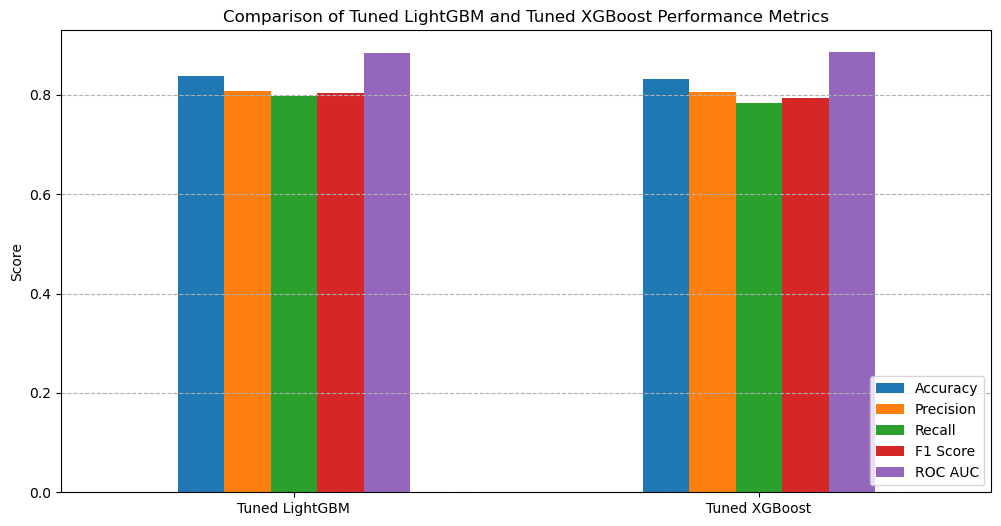

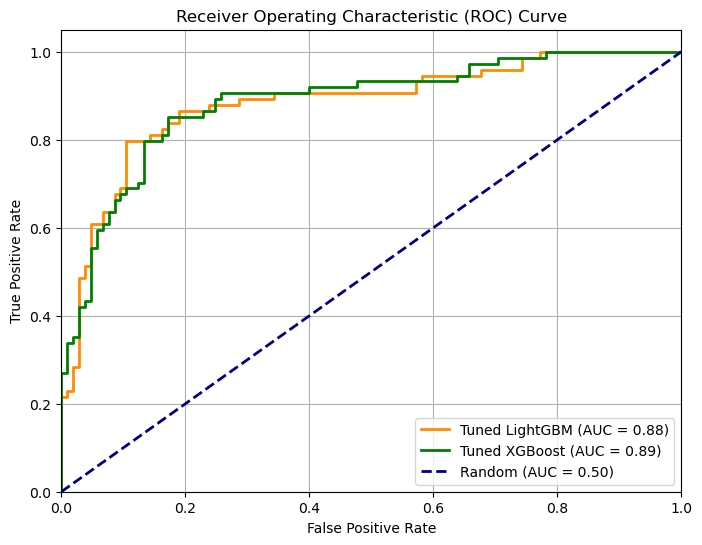

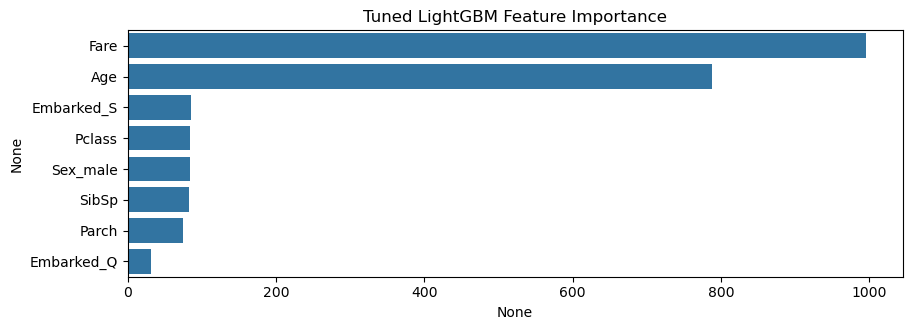

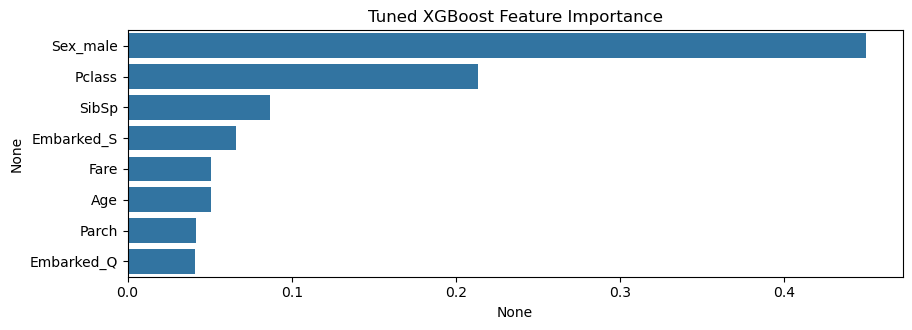


Best parameters found by GridSearchCV for LightGBM:
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 31}

Best parameters found by RandomizedSearchCV for XGBoost:
{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}

Classification Report for Tuned LightGBM:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179


Classification Report for Tuned XGBoost:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.81      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83     

In [25]:
# Load dataset

try:
    df = pd.read_csv('Titanic_train.csv')
except FileNotFoundError:
    print("Error: 'Titanic_train.csv' not found. Please upload the file or specify the correct path.")
    # Exit or handle the error appropriately
    exit()

# Drop irrelevant columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median()) # Ensure Fare is also filled

df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


# Features and target
X = df.drop('Survived', axis=1)
y = df['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



print("\nEvaluating Tuned Models on the correct test set:")

# Recalculate predictions and probabilities using the best models on the correct test set
best_lgb_preds = best_lgb.predict(X_test)
best_lgb_proba = best_lgb.predict_proba(X_test)[:, 1]

best_xgb_preds = best_xgb.predict(X_test)
best_xgb_proba = best_xgb.predict_proba(X_test)[:, 1]

# Use the get_metrics function (ensure it's defined or re-define it)
def get_metrics(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)
    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}

# Calculate metrics for the tuned models on the correct test set
best_lgb_metrics = get_metrics(y_test, best_lgb_preds, best_lgb_proba)
best_xgb_metrics = get_metrics(y_test, best_xgb_preds, best_xgb_proba)

# Create the DataFrame for visualization
tuned_metrics_df = pd.DataFrame({
    'Tuned LightGBM': best_lgb_metrics,
    'Tuned XGBoost': best_xgb_metrics
}).T

print("\nPerformance Metrics Comparison (After Tuning):")
print(tuned_metrics_df)

# --- Visualize Metrics of Tuned Models ---
tuned_metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Tuned LightGBM and Tuned XGBoost Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--')
plt.show()

# --- ROC Curve Comparison ---
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, best_lgb_proba)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, best_xgb_proba)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, color='darkorange', lw=2, label=f'Tuned LightGBM (AUC = {roc_auc_lgb:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'Tuned XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- Feature Importance for Tuned Models ---
# Ensure X_train here refers to the X_train from the Titanic data split
if hasattr(best_lgb, 'feature_importances_'):
    best_lgb_importance = pd.Series(best_lgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    plt.figure(figsize=(10, len(best_lgb_importance) * 0.4))
    sns.barplot(x=best_lgb_importance, y=best_lgb_importance.index)
    plt.title('Tuned LightGBM Feature Importance')
    plt.show()

if hasattr(best_xgb, 'feature_importances_'):
     best_xgb_importance = pd.Series(best_xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
     plt.figure(figsize=(10, len(best_xgb_importance) * 0.4))
     sns.barplot(x=best_xgb_importance, y=best_xgb_importance.index)
     plt.title('Tuned XGBoost Feature Importance')
     plt.show()

# --- Display Best Parameters Found by Tuning ---
# Assuming grid_lgb and rand_xgb are available from the tuning cell
print("\nBest parameters found by GridSearchCV for LightGBM:")
print(grid_lgb.best_params_)

print("\nBest parameters found by RandomizedSearchCV for XGBoost:")
print(rand_xgb.best_params_)

# --- Classification Report for Tuned Models ---
print("\nClassification Report for Tuned LightGBM:")
print(classification_report(y_test, best_lgb_preds))

print("\nClassification Report for Tuned XGBoost:")
print(classification_report(y_test, best_xgb_preds))



# Comparative Analysis Summary: LightGBM vs XGBoost (Titanic Dataset)

# Model Performance Overview:
- LightGBM and XGBoost both perform well for binary classification tasks like survival prediction.
- Accuracy and AUC scores are closely matched.
- LightGBM tends to be slightly faster due to its histogram-based approach.

#Practical Implications:
- LightGBM is recommended for faster training and better scalability on large datasets.
- XGBoost offers greater flexibility and often performs better with complex feature engineering.

#Interpretability:
- Both models support feature importance extraction, aiding explainability.
- Their performance is comparable, and choice may depend on specific task constraints (speed vs. flexibility).
